In [1]:
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2020-12-31'
df =  yf.download('TSLA', start, end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2020-12-23,210.733337,217.166672,207.523331,215.326660,215.326660,99519000
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import math 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

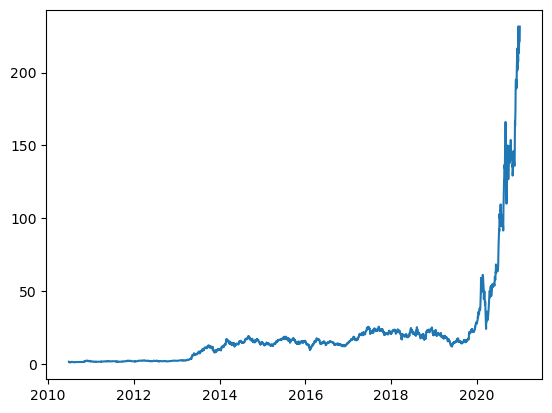

In [4]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [6]:
# Train Test split
to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

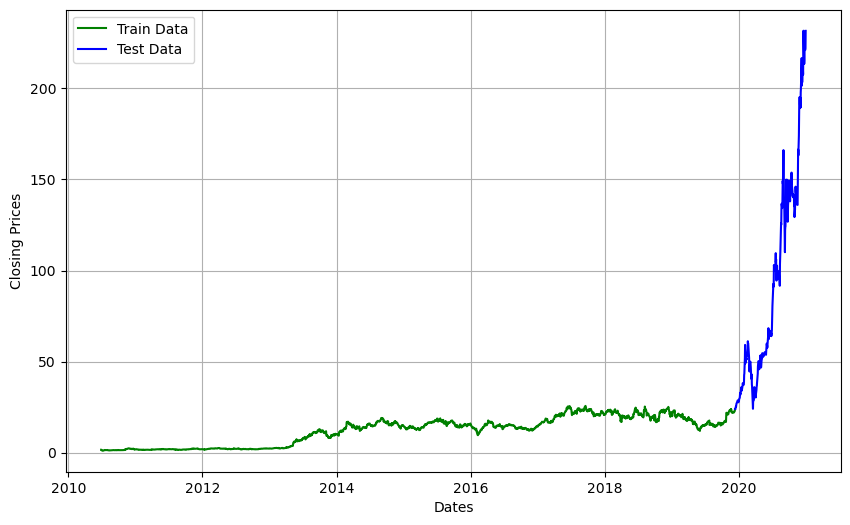

In [7]:
#Splitting data into train and testing set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green' , label= 'Train Data')
plt.plot(df[to_row:]['Adj Close'], 'blue' , label= 'Test Data')
plt.legend()

In [8]:
model_predictions = []
n_test_obser = len(testing_data)

In [9]:
output

NameError: name 'output' is not defined

In [10]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output =  model_fit.forecast()
    yhat = list(output(0)[0])
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
model_fit.summary()

NameError: name 'model_prediction' is not defined

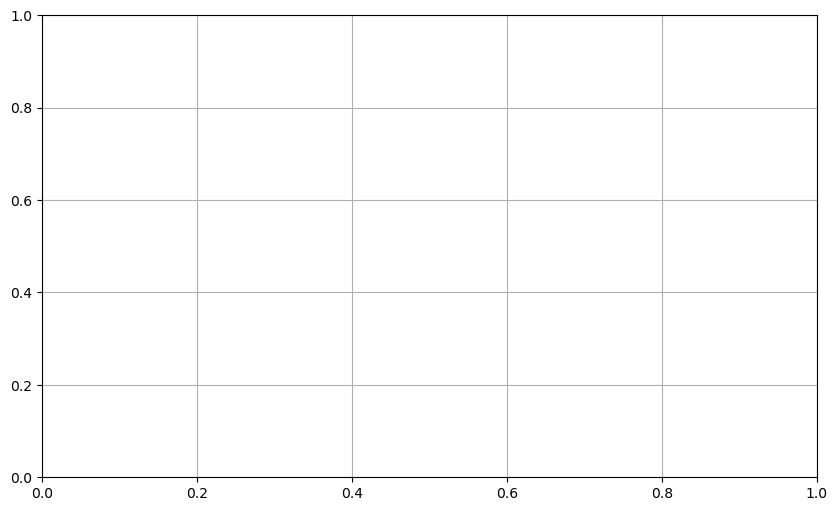

In [11]:
plt.figure(figsize=(10,6))
plt.grid(True)
date_range = df[to_row:].index

plt.plot(date_range, model_prediction, color='Blue', marker='o', linestyle ='dashed',label='BTC predicted price')
plt.plot(date_range, testing_data, color='red',label='BTC Actual price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()